In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
def click_pb(d):
    """
    click probability
    :param d:
    :return:
    """
    d = d.as_matrix()
    # print(len(d.shape))
    if len(d.shape) != 1:
        ValueError("1-d data input required!")
    nd = len(d)
    uip, counts = np.unique(d, return_counts=True)

    pb = np.zeros(uip.size)
    for i in range(uip.size):
        pb[i] = counts[i] #/nd

    return pb, uip


def entropy_measure(pb):
    """
    standard entropy measure
    :param pb:
    :return:
    """
    if len(pb.shape) != 1:
        ValueError("1-d data input required!")
    npb = len(pb)

    t = np.log2(pb)

    return np.log2(npb) - np.sum(pb*np.log2(pb))/npb


def nes(pb):
    """
	new entropy score from the paper
    :param pb:
    :return:
    """
    if len(pb.shape) != 1:
        ValueError("1-d data input required!")
    npb = len(pb)

    return 100.*(1. - np.sum(pb*np.log2(pb))/(npb*np.log2(npb)))


## TEST NES AND ENTROPY METHODS FOR FRAUD DETECTION
## THE TWO PLOTS BELOW SHOW THE RESULT FROM THE BOTH METHODS

orig data shape = (93206, 5)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8, 10, 10, 10, 12, 12, 16, 18, 19, 19, 19, 20, 21, 21, 21, 24, 30, 32, 36, 37, 38, 43, 45, 46, 66, 71, 77, 79, 83, 93, 100, 133, 142, 143, 152, 186, 194, 228, 270, 284, 326, 336, 386, 582, 589, 666, 1068, 1435, 2254, 2361, 2448, 2494, 8037, 12131, 55062]
7020618.0
6975753.0
4312638.0
5132926.0
3734060.0
6758117.0
4663165.0
6784353.0
5044143.0
6821584.0
15033.0
7019696.0
7020353.0
7020140.0
6964282.0
7020260.0
7019690.0
6837158.0
7020277.0
6944618.0
7020601.0
7016808.0
6959878.0
6340441.0


C:\Users\Intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Text(0.5,1,'red line -> threshold')

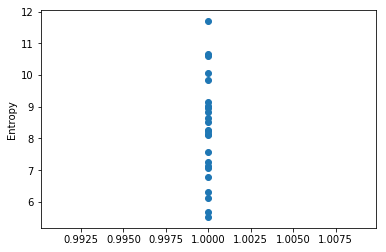

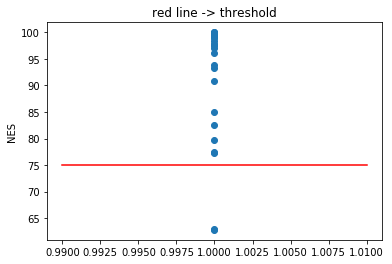

In [17]:
# Load data
referrer_sub = pd.read_csv('referrer_sub.csv', sep=',')
referrer_sub = referrer_sub.drop('Unnamed: 0', 1)

print('orig data shape = ' + str(referrer_sub.shape))

refID = referrer_sub['click_data_referrer_domain_id'].unique()

refDic = {}
for i in range(len(refID)):
    refDic[refID[i]] = len(referrer_sub[referrer_sub['click_data_referrer_domain_id'] == refID[i]])

print(sorted(refDic.values()))

refSorted = sorted(refDic, key=refDic.__getitem__)
type(refSorted)
refSortedIdx = reversed(refSorted)

entp = []
score = []

for i in reversed(refSorted):
    if refDic[i] > 100:
        print(i)

        d2 = referrer_sub[referrer_sub['click_data_referrer_domain_id'] == i]
        d2 = d2['click_data_ip_address']
        pb, uip = click_pb(d2)
        entp.append(entropy_measure(pb))
        score.append(nes(pb))

x = np.ones(len(entp))

plt.figure(1)
plt.scatter(x, entp)
plt.ylabel(('Entropy'))

plt.figure(2)
plt.scatter(x, score)
plt.plot([0.99, 1.01], [75, 75], 'red')
plt.ylabel(('NES'))
plt.title('red line -> threshold')